# **Capstone Step 5: Data Wrangling and Exploration**

In [2]:
# Import necessary dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# *1. Read raw data*

In [5]:
raw_ratings = pd.read_csv('./data/Ratings.zip')

raw_books = pd.read_csv('./data/Books.zip')

raw_users = pd.read_csv('./data/Users.zip')

G:\anaconda3\envs\mec-miniprojects\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
raw_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
raw_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
raw_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# *2. Count null entries in each dataframe*

In [9]:
raw_ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
raw_books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
raw_users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

It seems many users have chosen not to provide their age. This should not present a major issue since collaborative filtering techniques don't necessarily rely on any user information beyond the ratings themselves. Null entries in raw_books will be dropped.

# *3. Clean dataframes*

In [12]:
dfRatings = raw_ratings #no cleaning required for ratings
dfBooks = raw_books.dropna()
dfUsers = raw_users.drop(columns=['Age'])

In [13]:
dfRatings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
# dfBooks.head()
dfBooks.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [15]:
# dfUsers.head()
dfUsers.isna().sum()

User-ID     0
Location    0
dtype: int64

# *4. Exploration and additional cleaning/wrangling/filtering*

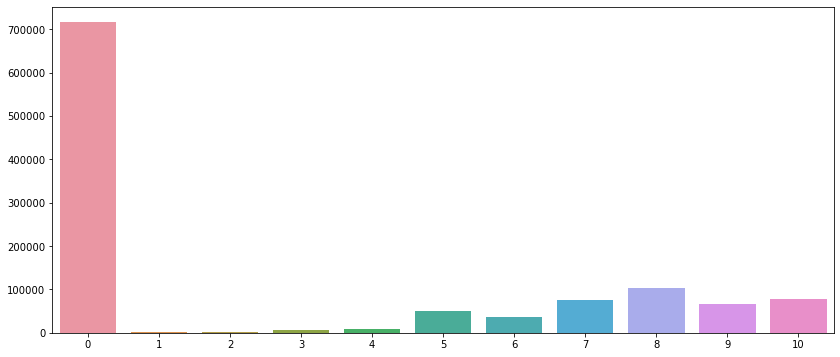

In [16]:
# Plot distribution of ratings

fig, ax = plt.subplots(1, 1, figsize = (14, 6))

ratings = dfRatings['Book-Rating'].value_counts().sort_index()
x = ratings.index.map(int)
y = ratings.values

sns.barplot(x, y)
plt.show()

Woah! Glad I did this first plot. It seems like books users haven't rated are applied a rating of 0 by that user. These rows will need to be dropped from dfRatings. This means I'll lose out on any real 0 scores, but there's no telling which 0 ratings were user-generated and which were automatically filled. Perhaps a weakness of this dataset compared to others.

In [17]:
dfRatings_clean = dfRatings[dfRatings['Book-Rating']!=0]

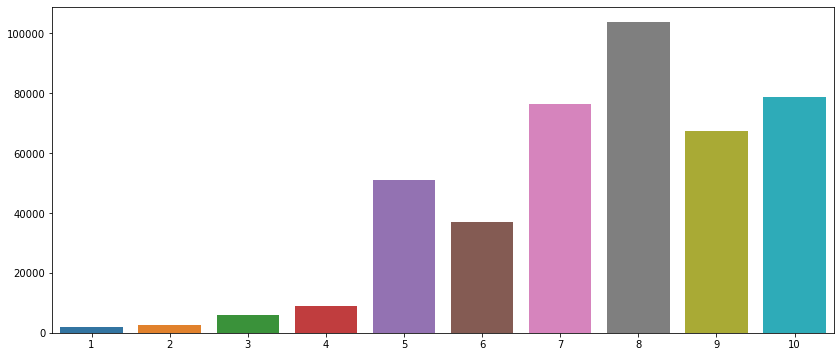

In [18]:
# Plot distribution of ratings again with dfRatings_clean

fig, ax = plt.subplots(1, 1, figsize = (14, 6))

ratings = dfRatings_clean['Book-Rating'].value_counts().sort_index()
x = ratings.index.map(int)
y = ratings.values

sns.barplot(x, y)
plt.show()

Definitely better. Unsurprisingly to me, though, is that the ratings are skewed quite significantly to higher values.